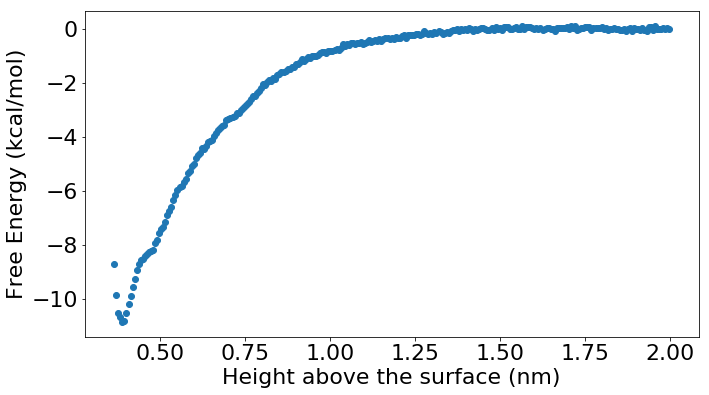

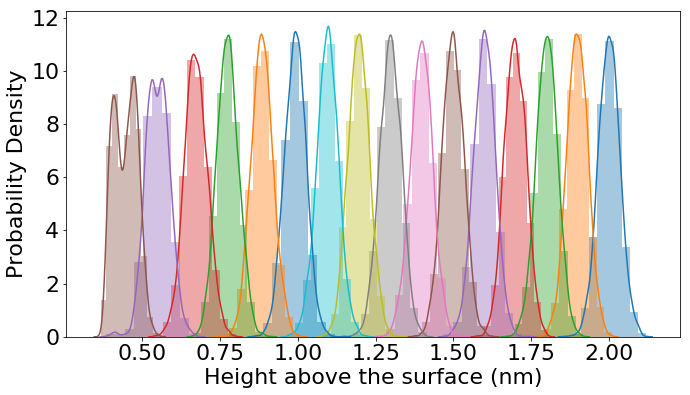

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
plt.rc('figure', figsize=(11,6))
matplotlib.rcParams.update({'font.size': 22})

############################ PMF##########################

with open('adsorption.pmf') as us:
    data = []
    for line in us:
        if line[0] != '#':
            data.append(line.split('\t'))
            free_energy = np.array(data)

dist = np.array(list(map(float,free_energy[:,0])))*0.1 #to make nm
pmf = np.array(list(map(float,free_energy[:,1])))

plt.scatter(dist,pmf-pmf[-1])
plt.xlabel('Height above the surface (nm)')
plt.ylabel('Free Energy (kcal/mol)')
plt.savefig('adosrption')
plt.show()
#########################################################
################# Histogram ############################
def get_traj(inputfile):
    traj=[]
    distance=[]
    with open(inputfile) as traj1:
        for line in traj1:
            if line[0] == '#':
                traj=[]
            elif line != '\n':
#                 traj.append(list(map(float, line.split())[1]))
                traj.append(float(line.split()[1]))

                distance.extend(traj)
                traj=[]
    return np.array(distance)

num_window = 16
plots =[]
for i in range(num_window):
    files = './traj_5/win_%d.colvars.traj' %i
    ax = sns.distplot(get_traj(files)*0.1, bins =10,kde=True,hist =True)
    #ax.set_yticks([0,1])
    #ax.set_ylabel('Count')
    #plt.xlim(25,30)
    plots.append(ax) 
    #sns.distplot(get_traj(files)[:,1]*0.1, norm_hist=True, kde=True,hist =False)
    
plt.xlabel('Height above the surface (nm)')
plt.ylabel('Probability Density')
plt.savefig('histograms_adsorption')
plt.show()    
#######################################################
